In [39]:
import numpy as np
import pandas as pd
import sklearn
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
 
# URLs of the data and names files
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names"

#Complete code also in github : 

#https://github.com/CarlosGarcia-YK/Codes/blob/main/Price_Preduction_3.ipynb


To get and print the data

In [40]:

# Download and save the data file
urllib.request.urlretrieve(data_url, "housing.data")

# Download and save the names file
urllib.request.urlretrieve(names_url, "housing.names")

('housing.names', <http.client.HTTPMessage at 0x284186431d0>)

To open information to the data 

In [41]:
with open("Data/housing.names", "r") as file:
    content = file.read()
print(content)


1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

To obtain data information and change the columns' names 

In [42]:
df = pd.read_csv("Data/housing.data", delim_whitespace=True, header=None)
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

C:\Users\yourk\AppData\Local\Temp\ipykernel_10980\1101388959.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Data/housing.data", delim_whitespace=True, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


Some extra information about the data given

In [43]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Graph the data information

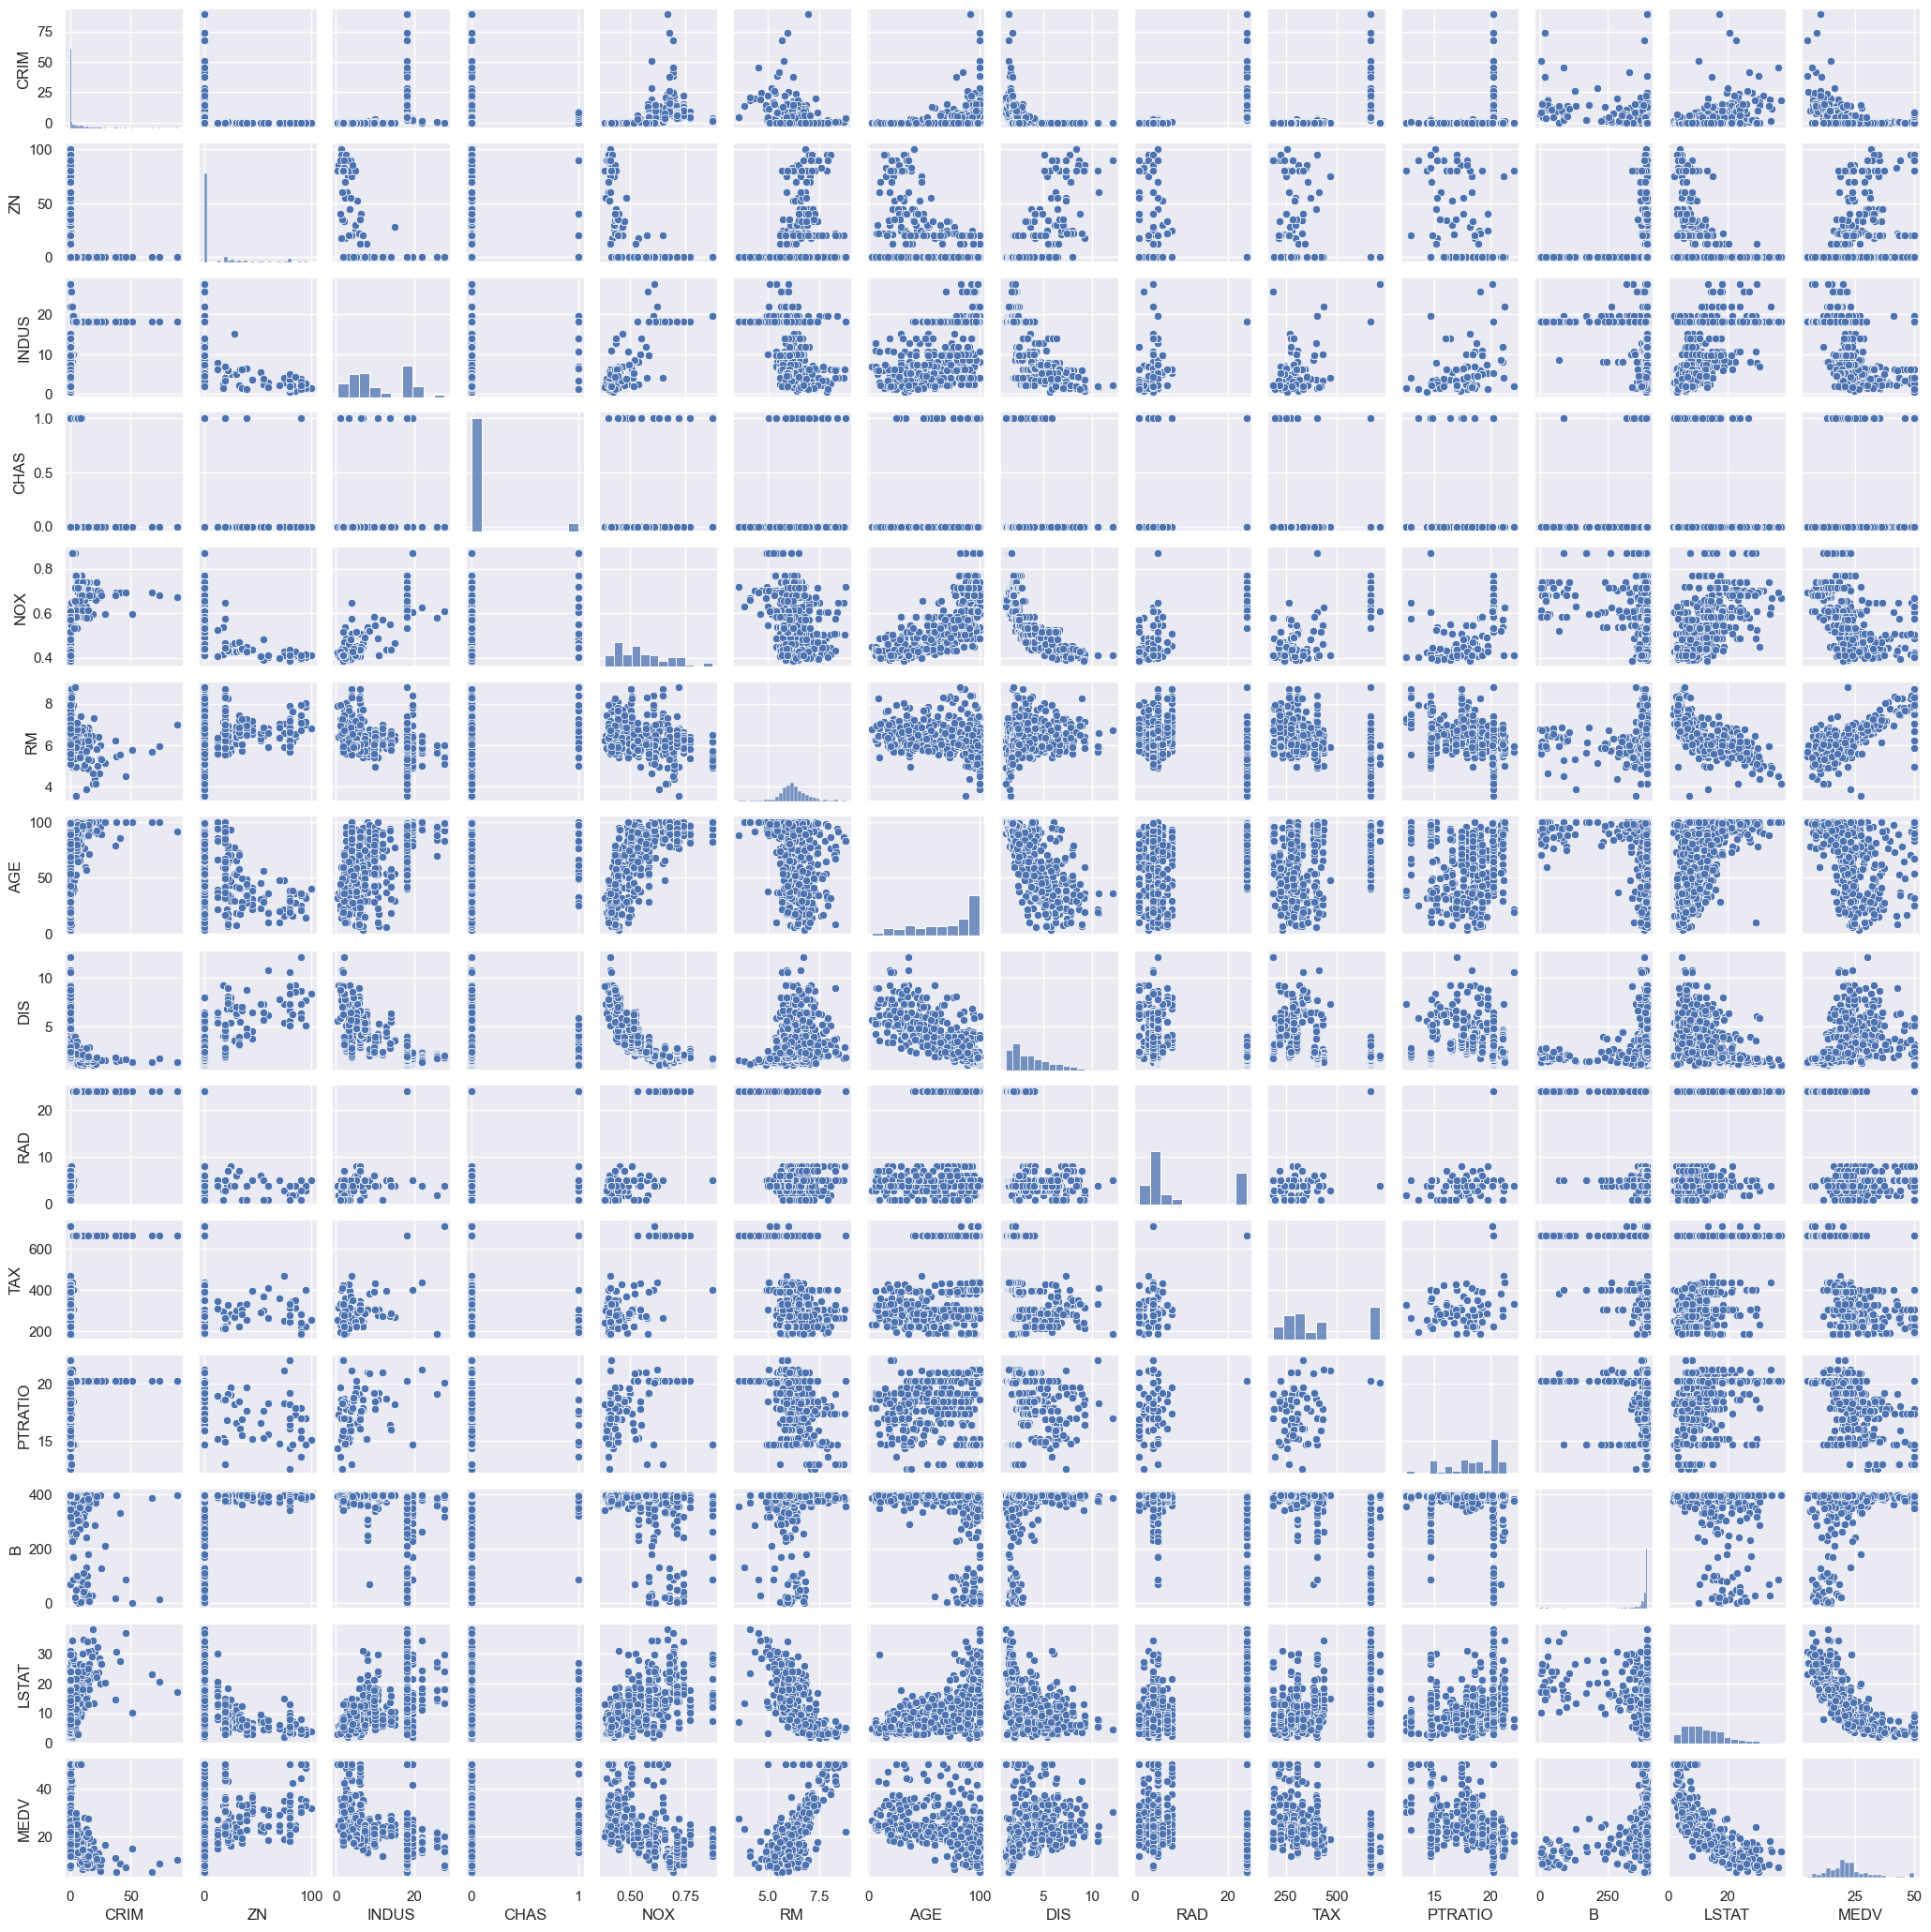

In [44]:
sns.pairplot(df, height=1.5);
plt.show()

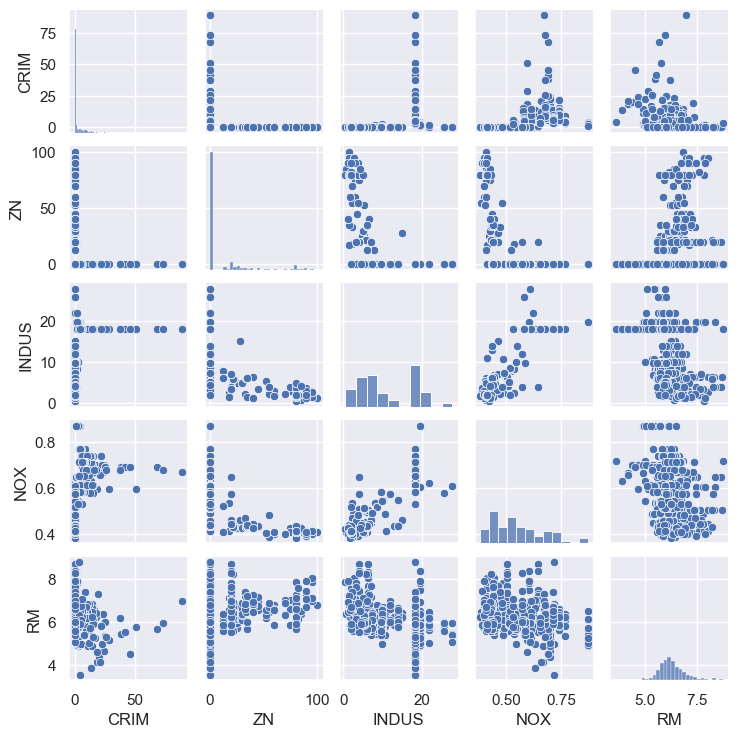

In [45]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']
sns.pairplot(df[col_study], height=1.5);
plt.show()

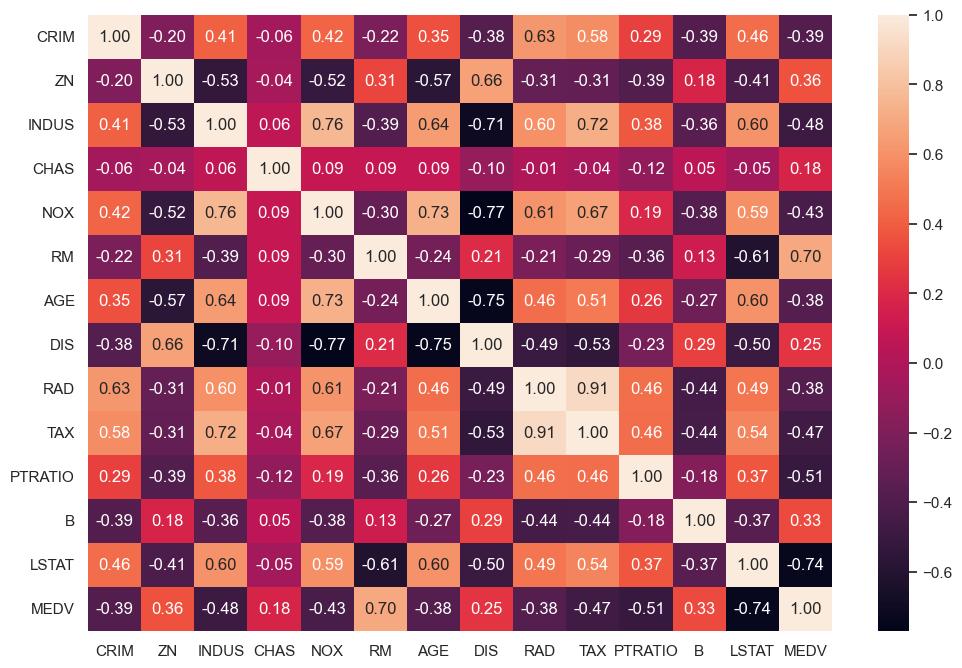

In [46]:
pd.options.display.float_format = '{:,.2f}'.format
df.corr()
 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

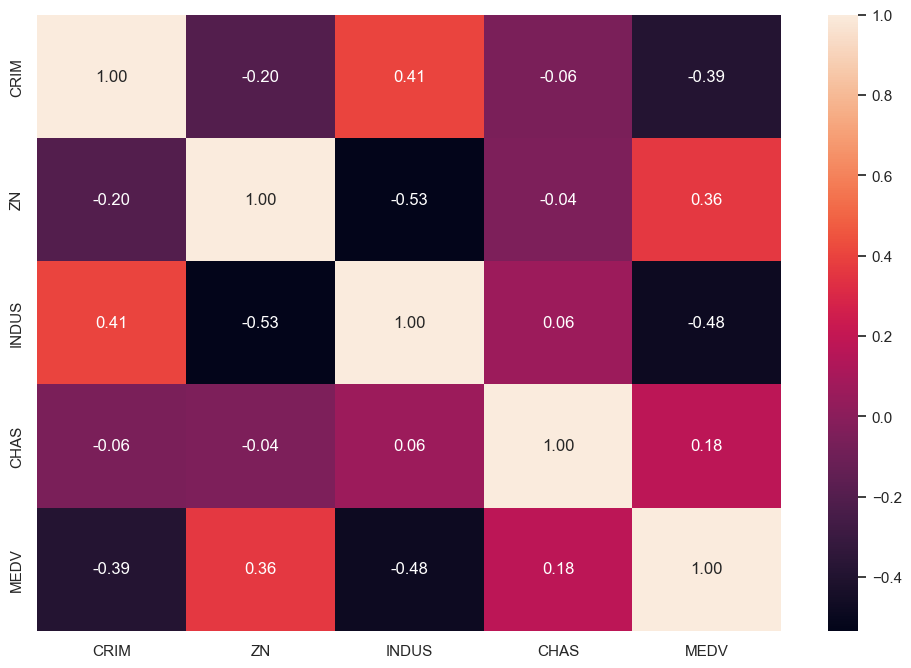

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'MEDV']].corr(), annot=True, fmt=".2f")
plt.show()
 
import matplotlib as mpl
 
df.head()

<Axes: >

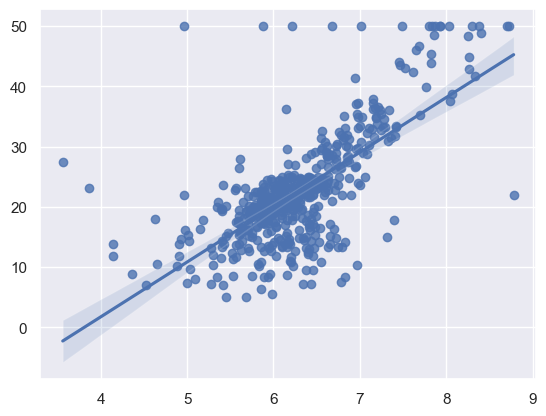

In [48]:
Xrm = df['RM'].values.reshape(-1,1)
ymedv = df['MEDV'].values.reshape(-1,1)
sns.regplot(x=Xrm,y=ymedv)

In [49]:
model = LinearRegression()
model.fit(Xrm,ymedv)

LinearRegression()

In [50]:
#model.coef_ #Coeficient
model.intercept_ #Coordenates

array([-34.67062078])

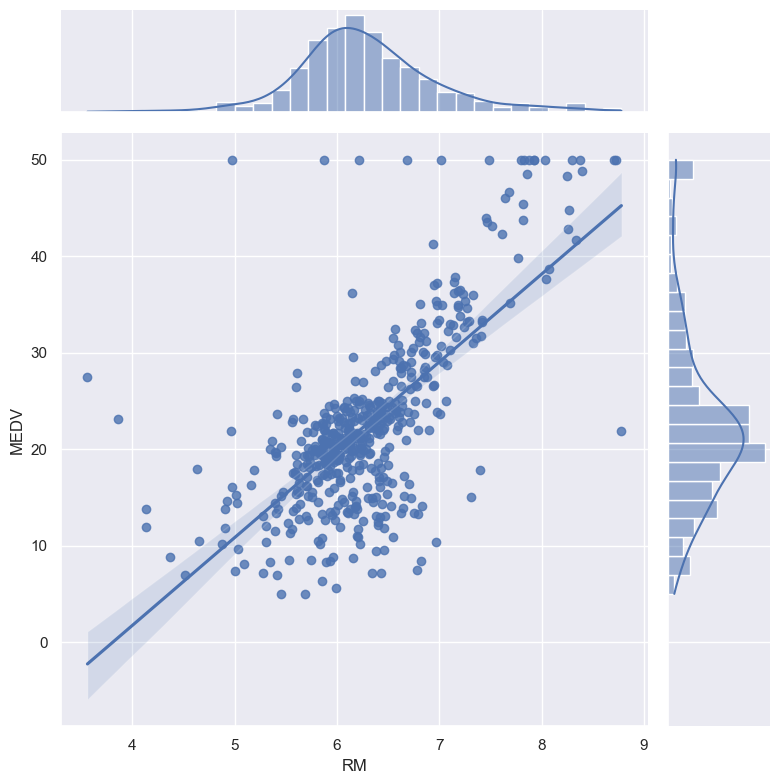

In [51]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=8);
plt.show();

In [52]:
model.predict(np.array([6]).reshape(1,-1))

array([[19.94203311]])

In [53]:
df.head()
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values
 
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

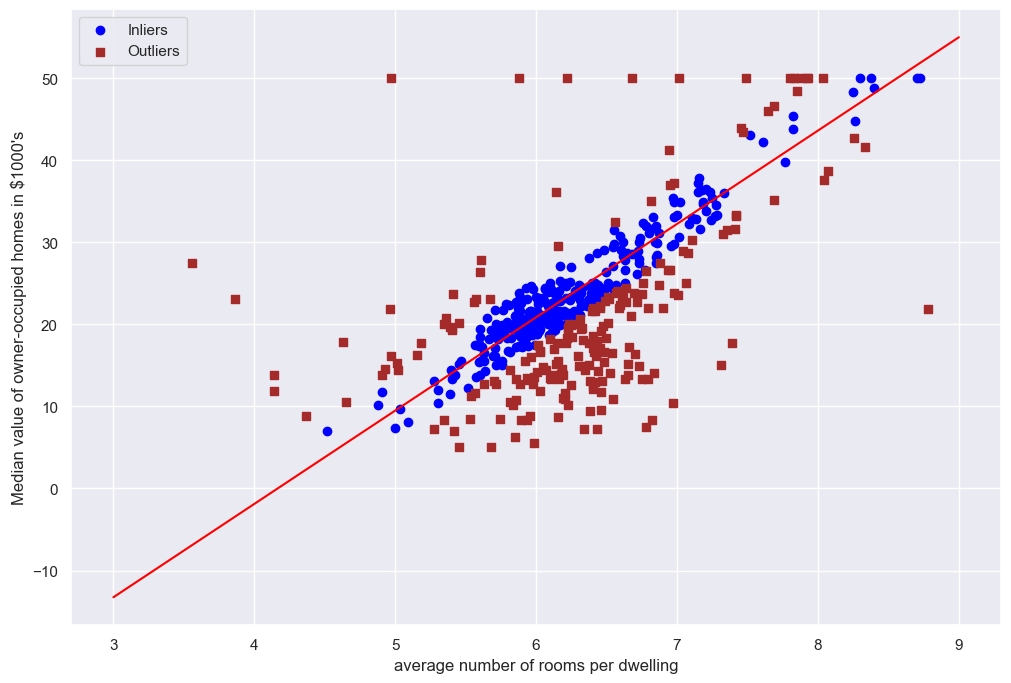

In [54]:
 
np.arange(3, 10, 1)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))
 

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()


 

In [55]:
ransac.estimator_.coef_


array([11.38122287])

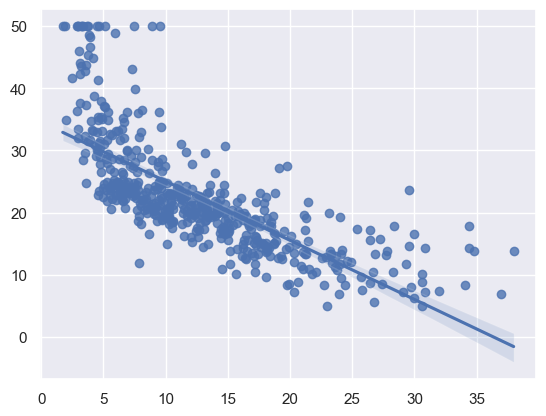

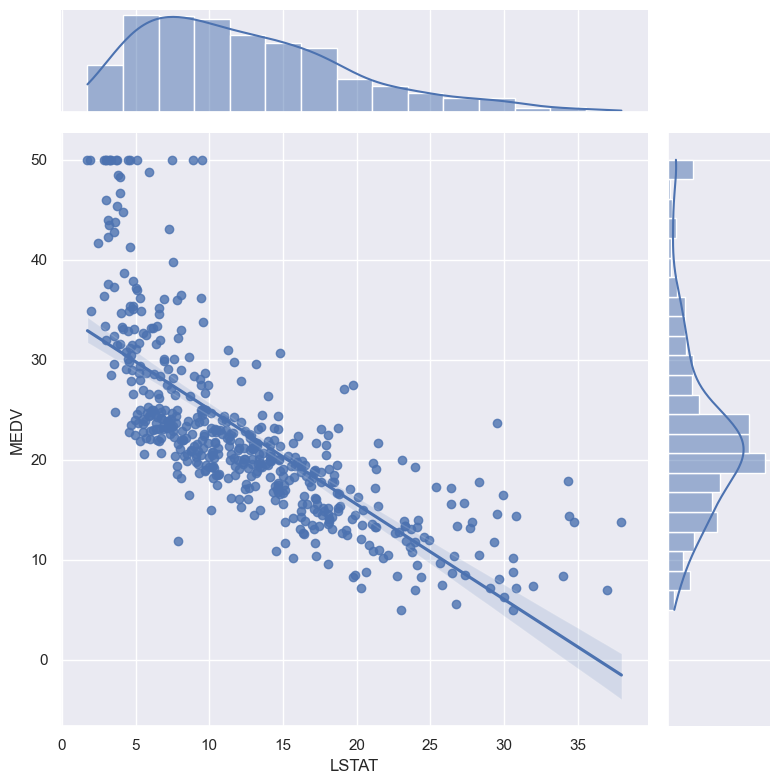

array([[20.30310057]])

In [56]:
#Example #2
Xstat = df['LSTAT'].values.reshape(-1,1)
ymedv = df['MEDV'].values.reshape(-1,1)
sns.regplot(x=Xstat,y=ymedv)
model = LinearRegression()
model.fit(Xstat,ymedv)
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=8);
plt.show();
model.predict(np.array([15]).reshape(1,-1))

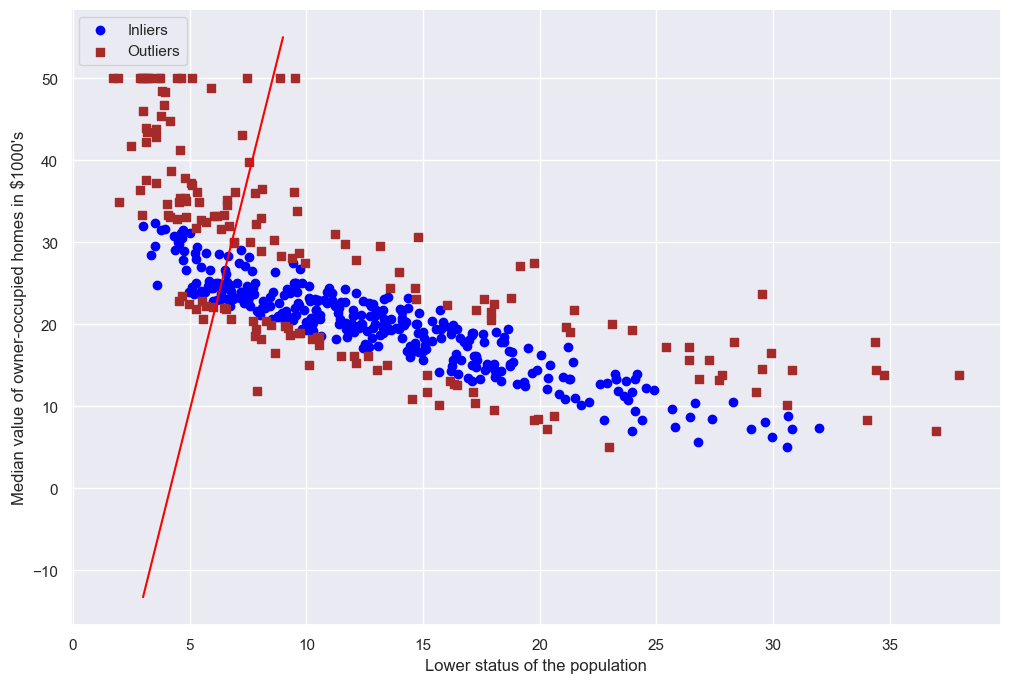

In [57]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values


from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [58]:
ransac.estimator_.coef_


array([-0.81267273])